<a href="https://colab.research.google.com/github/bulutirm/DigitRecognition/blob/main/DigitRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digit Recognition wit ANN

# 1. Business Problem

   Problem: Can we use the manpower resource more efficiently?
   
   MNIST ("Modified National Institue of Standards and Technology")

   http://yann.lecun.com/exdb/mnist/index.html





# 2. Data Understanding



In [ ]:
pip install tensorflow

In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical, plot_model

import matplotlib.pyplot as plt
import numpy as np

import warnings
from warnings import filterwarnings
warnings.filterwarnings("ignore", category = DeprecationWarning)
warnings.filterwarnings("ignore", category = FutureWarning)
warnings.filterwarnings("ignore", category = UserWarning)
filterwarnings("ignore")

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
print("Train set size:", x_train.shape, y_train.shape)

Train set size: (60000, 28, 28) (60000,)


In [7]:
print("Test set size:", x_test.shape, y_test.shape)

Test set size: (10000, 28, 28) (10000,)


In [8]:
num_labels = len(np.unique(y_train))

In [13]:
def visualize_img(data):
  plt.figure(figsize = (10, 10))
  for n in range(10):
    ax = plt.subplot(5, 5, n+1)
    plt.imshow(data[n], cmap = 'gray')
    plt.axis('off')

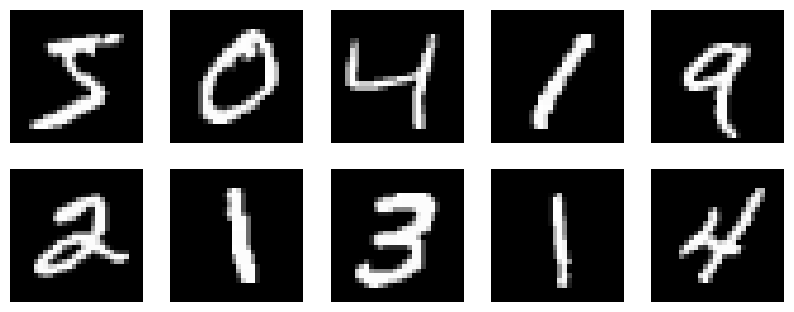

In [15]:
visualize_img(x_train)

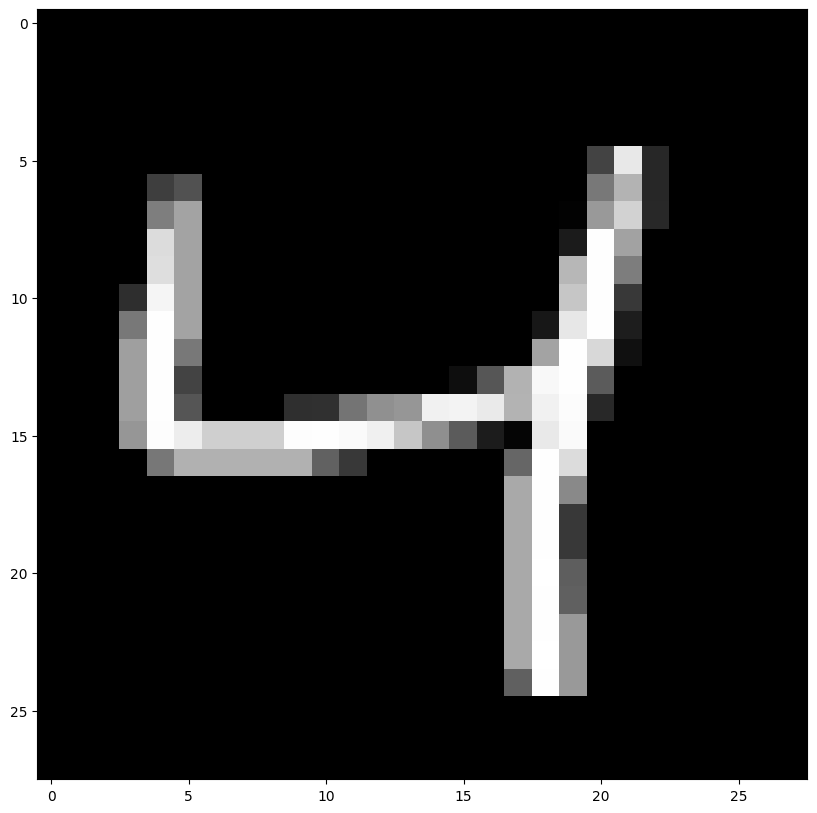

In [22]:
plt.figure(figsize = (10,10))
plt.imshow(x_train[2], cmap = 'gray')

In [19]:
x_train[2].shape

(28, 28)

In [ ]:
x_train[2]

In [21]:
x_train[2][10,10]

0

In [23]:
x_train[2][14,10]

49

In [25]:
x_train[2].sum()

19443

In [27]:
x_train[2][14:20, 10:20].mean()

96.51666666666667

In [36]:
def pixel_validation(img):
  fig = plt.figure(figsize=(12,12))
  ax = fig.add_subplot(111)
  ax.imshow(img, cmap='gray')
  width, height = img.shape

  threshold = img.max() / 2.5

  for x in range(width):
    for y in range(height):

      ax.annotate(str(round(img[x][y], 2)), xy=(y,x),
                  color = 'white' if img[x][y]<threshold else 'black')

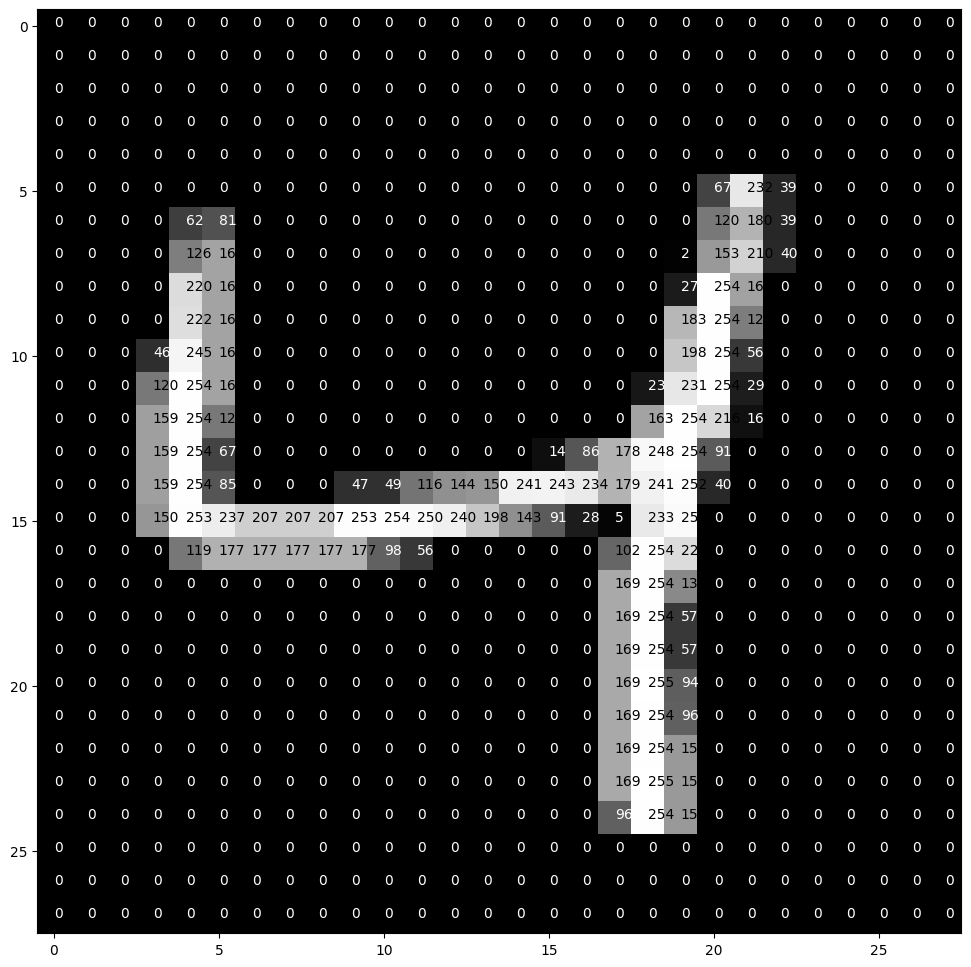

In [37]:
pixel_validation(x_train[2])



# 3. Data Preparation





##Encoding



In [38]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [39]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [40]:
y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

##Reshaping

In [43]:
image_size = x_train.shape[1]

In [44]:
image_size

28

In [46]:
print(f"x_train size: {x_train.shape}")
print(f"x_test size: {x_test.shape}")

x_train size: (60000, 28, 28)
x_test size: (10000, 28, 28)


In [47]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

print(f"x_train size: {x_train.shape}")
print(f"x_test size: {x_test.shape}")

x_train size: (60000, 28, 28, 1)
x_test size: (10000, 28, 28, 1)


##Standardization

In [48]:
x_train = x_train.astype('float32') / 255

x_test = x_test.astype('float32') / 255

# 4. Modeling

## Define neural network architecture

In [51]:
model = tf.keras.Sequential([
    Flatten(input_shape = (28, 28, 1)),
    Dense(units=128, activation='relu', name='layer1'),
    Dense(units = num_labels, activation = 'softmax', name = 'output_layer')])

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = [tf.keras.metrics.Precision(),
                         tf.keras.metrics.Recall(),
                         "accuracy"])

In [52]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 layer1 (Dense)              (None, 128)               100480    
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [55]:
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0602 - precision_1: 0.9862 - recall_1: 0.9800 - accuracy: 0.9831 - val_loss: 0.0851 - val_precision_1: 0.9777 - val_recall_1: 0.9700 - val_accuracy: 0.9730
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0501 - precision_1: 0.9883 - recall_1: 0.9832 - accuracy: 0.9858 - val_loss: 0.0804 - val_precision_1: 0.9786 - val_recall_1: 0.9725 - val_accuracy: 0.9748
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0429 - precision_1: 0.9897 - recall_1: 0.9855 - accuracy: 0.9877 - val_loss: 0.0747 - val_precision_1: 0.9788 - val_recall_1: 0.9733 - val_accuracy: 0.9764
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0365 - precision_1: 0.9915 - recall_1: 0.9881 - accuracy: 0.9898 - val_loss: 0.0743 - val_precision_1: 0.9802 - val_recall_1: 0.9759 - val_accuracy: 0.9775
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss

# 5. Evaluation

In [56]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0117 - precision_1: 0.9977 - recall_1: 0.9970 - accuracy: 0.9975 - val_loss: 0.0768 - val_precision_1: 0.9802 - val_recall_1: 0.9772 - val_accuracy: 0.9783
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0100 - precision_1: 0.9983 - recall_1: 0.9977 - accuracy: 0.9981 - val_loss: 0.0778 - val_precision_1: 0.9796 - val_recall_1: 0.9773 - val_accuracy: 0.9783
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0090 - precision_1: 0.9984 - recall_1: 0.9980 - accuracy: 0.9981 - val_loss: 0.0827 - val_precision_1: 0.9798 - val_recall_1: 0.9766 - val_accuracy: 0.9775
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0072 - precision_1: 0.9989 - recall_1: 0.9986 - accuracy: 0.9987 - val_loss: 0.0796 - val_precision_1: 0.9799 - val_recall_1: 0.9777 - val_accuracy: 0.9789
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - los

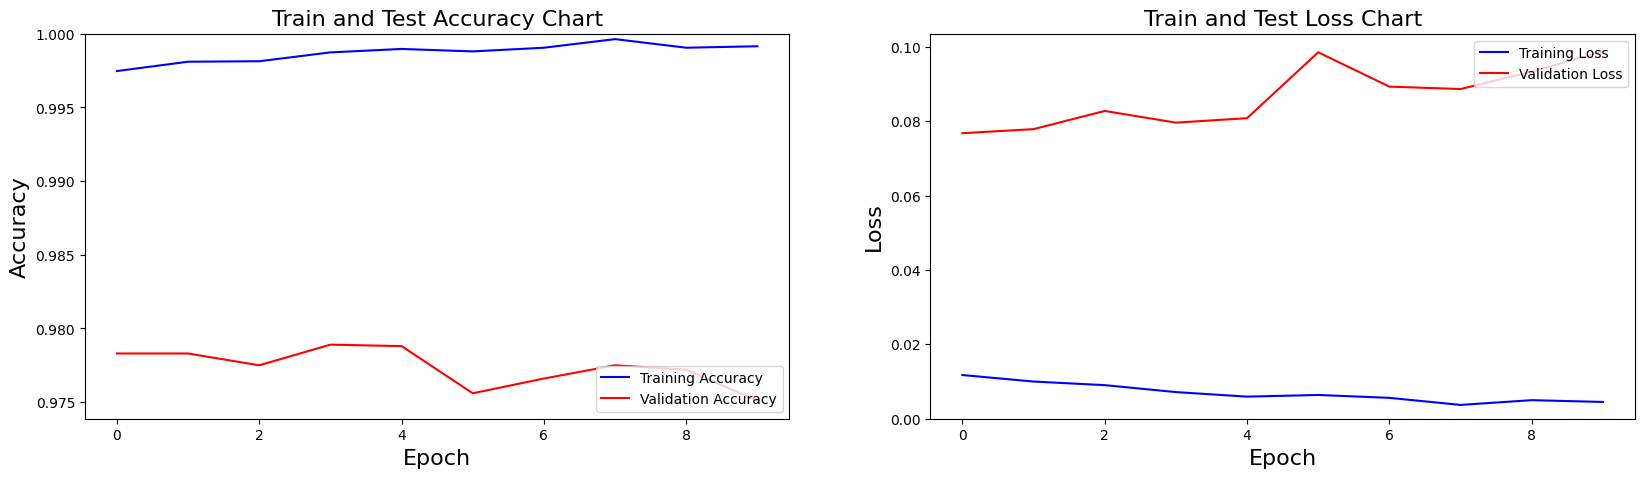

In [57]:
#Accuracy and Loss Graphics

#Graphic 1 Accuracy

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], color='b', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='r', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.ylim([min(plt.ylim()),1])
plt.title('Train and Test Accuracy Chart', fontsize=16)

#Graphic 2 Loss

plt.subplot(1,2,2)
plt.plot(history.history['loss'], color='b', label='Training Loss')
plt.plot(history.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.ylim([0, max(plt.ylim())])
plt.title('Train and Test Loss Chart', fontsize = 16)
plt.show()

In [58]:
loss, precision, recall, acc = model.evaluate(x_test, y_test, verbose=False)
print("\nTest Accuracy: %.lf%%" % (100.0 * acc))
print("\nTest Loss: %.lf%%" % (100.0 * loss))
print("\nTest Precision: %.lf%%" % (100.0 * precision))
print("\nTest Recall: %.lf%%" % (100.0 * recall))



Test Accuracy: 98%

Test Loss: 10%

Test Precision: 98%

Test Recall: 97%


# Saving the Model and Using it for Prediction

In [59]:
model.save('mnist_model.hs')

In [61]:
import random
random = random.randint(0, x_test.shape[0])

In [62]:
random

9715

In [63]:
test_image = x_test[random]

In [64]:
y_test[random]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

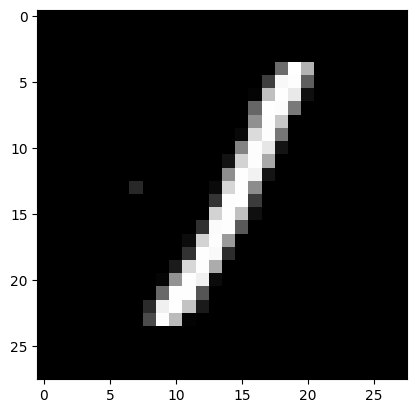

In [65]:
plt.imshow(test_image.reshape(28,28), cmap = 'gray')

In [66]:
test_data = x_test[random].reshape(1, 28, 28, 1)

In [67]:
probability = model.predict(test_data)

1/1 [==============================] - 0s 143ms/step


In [68]:
probability

array([[2.0288760e-11, 9.9999845e-01, 1.0044776e-07, 4.0752071e-10,
        3.4957185e-07, 1.6244104e-13, 3.2347207e-12, 1.1025124e-06,
        2.0347617e-08, 9.9681602e-13]], dtype=float32)

In [70]:
predict_classes = np.argmax(probability)

In [71]:
predict_classes

1

In [73]:
print(f"Estimated Class: {predict_classes} \n")
print(f"Probability Value of the Estimated Class: {(np.max(probability, axis = -1))[0]} \n")
print(f"Probability Value of the Other Classes: \n{probability}")

Estimated Class: 1 

Probability Value of the Estimated Class: 0.9999984502792358 

Probability Value of the Other Classes: 
[[2.0288760e-11 9.9999845e-01 1.0044776e-07 4.0752071e-10 3.4957185e-07
  1.6244104e-13 3.2347207e-12 1.1025124e-06 2.0347617e-08 9.9681602e-13]]
